In [1]:

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
from scipy.stats import skew
from scipy.stats import kurtosis
slim = tf.contrib.slim

from tensorflow.contrib.distributions import percentile as tf_percent


print(tf.__version__)

sess = tf.Session()
sess.run(tf.global_variables_initializer())
x = [[1.0,10.0,12.0,10.0],[3.0,2.0,5.0,10.0],[3.0,10.0,5.0,2.0]]
print(x)
print(np.shape(x))
X = x 
tf.reduce_mean(tf.pow(tf.subtract(X ,tf.reduce_mean(X , axis=0)) ,3.0),axis=0).eval(session = sess )
tf.pow(tf.reduce_mean(tf.square(tf.subtract(X ,tf.reduce_mean(X , axis=0))), axis=0),1.5).eval(session = sess )
tf.reduce_mean(tf.pow(tf.subtract(X ,tf.reduce_mean(X , axis=0)),4.0) , axis = 0 ).eval(session = sess )

In [2]:


#tf.executing_eagerly()
# x = [[2.]]
# m = tf.matmul(x, x)
# print("hello, {}".format(m))  # => "hello, [[4.]]"

## tf.nn.leaky_relu : 분포를 뾰족하게 만든다.
## tf.nn.elu : 분포를 왼쪽으로 쏠리게 만든다.
## tf.nn.relu : 분포를 왼쪽으로 쏠리게 만든다.
* https://github.com/mp2893/medgan/blob/master/medgan.py 아이디어를 쌓는 방식을 비슷하게 해봣ㅈ만 결과는 좋지 않음

 # Mapping Newotk Test

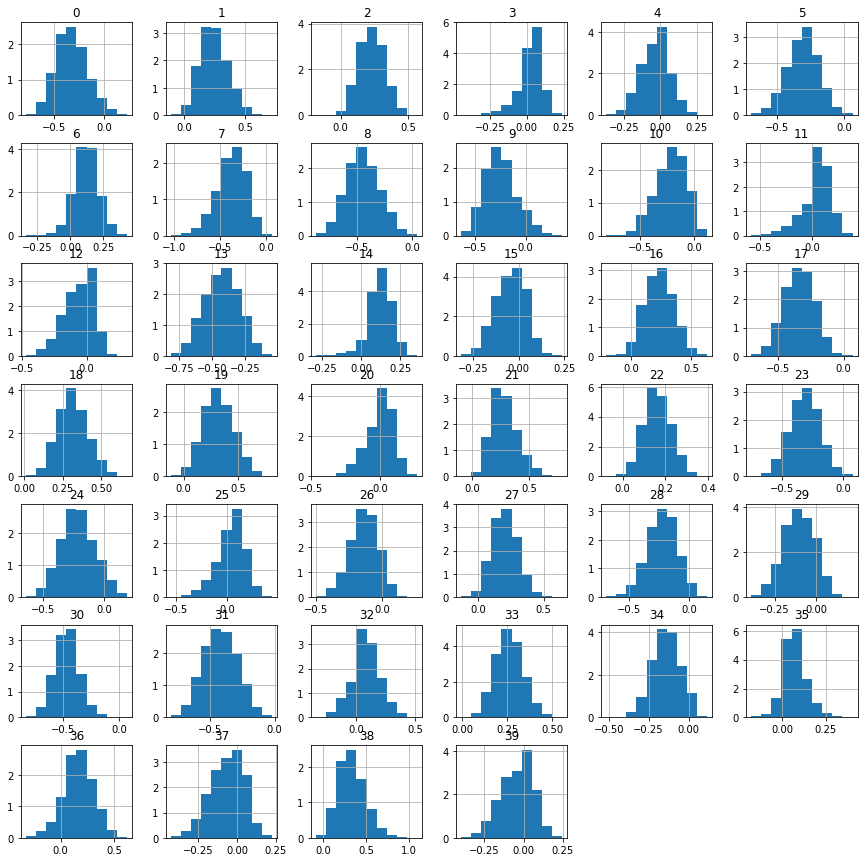

In [3]:
tf.reset_default_graph()
def sample_Z(m , n ):
    return np.random.uniform(low=0 , high=1 ,  size=[m , n])

def mapping_net_22( Z , hsize = None , reuse = tf.AUTO_REUSE) : 
    with tf.variable_scope("test_map" , reuse = reuse) : 
        h = tf.layers.dense(Z,hsize[0], activation=tf.nn.leaky_relu , )
        #h = tf.layers.dense(h,hsize[0], activation=tf.nn.leaky_relu)
        #h = slim.dropout(h, keep_prob=0.2  , scope='dropout_map_1st')
        for i in np.arange( len(hsize)-1 )  : 
            if i % 2 == 0 : 
                active = tf.nn.relu
            elif i % 2 == 1 : 
                active = tf.nn.selu 
            h = tf.layers.dense(h,hsize[i+1],
                                activation=active ,
                                name="map_w_"+str(i) , 
                                kernel_initializer= tf.contrib.layers.xavier_initializer() )
            #h = tf.contrib.layers.batch_norm(h , decay=0.1 , renorm_clipping= (0 , 1) ,activation_fn = tf.nn.selu   )
        return h

# def G_shared( Z , hsize = None , reuse = tf.AUTO_REUSE) : 
#     with tf.variable_scope("test_share" , reuse = reuse ) : 
#         h = tf.layers.dense(Z,hsize[0], activation=tf.nn.selu )
# #         h = slim.dropout(h, keep_prob=0.8  , scope='dropout_share_1st') 
#         for i in np.arange( len(hsize)-1 )  : 
#             h = tf.layers.dense(h,hsize[i+1],activation=tf.nn.selu ,
#                                 name="shared_w_"+str(i) ,
#                                 kernel_initializer= tf.contrib.layers.xavier_initializer())

            
#         return h    
    
m = 4000
n = 40

Z_1 = sample_Z(m , n)

Z = tf.placeholder(tf.float32,[None, n ], name = "Z1")
hsize = [n]* 5
#Z = (Z - tf.reduce_mean(Z ,axis = 0 )) / 2*tf.keras.backend.std(Z )
output = mapping_net_22(Z = Z , hsize = hsize )

#output = G_shared(output , hsize = hsize)

sess = tf.Session()
tf.global_variables_initializer().run(session=sess)
output2 = sess.run(output, feed_dict={Z: Z_1})
pd.DataFrame(output2).hist(figsize = (15, 15), density=True)
plt.show()


In [4]:
columns = ['SCORE_ORG', 'SCORE_NK0200_000', 'SCORE_RK0400_700',
           'CNT_CONTACT_POS','CNT_ENG', 'DAYS_CONTACT_POS',
           'DAYS_CALL_PAYMENT','EWS_C_N_P27000100',
           'EWS_A_K_D1M232000_OPR', 'EWS_C_N_P42000200','EWS_C_N_P32003000',
           'AGE','CNT_Contact','EWS_A_K_D1M23200C_OPR',
           'EWS_C_K_D10310000_OPR','EWS_A_K_D90232200_OPR',
           'D_N_CA0000603','EWS_C_N_P32002600','EWS_D_N_P43004000',
           'C_N_PS0001777','A_K_D10220000_OPR','SCORE_RK0400_000',
           'D_K_D10310000_OPR','D_K_L2Z000034','D_K_L20283000','EWS_D_K_L20283000',
           'EWS_D_N_P43004500','D_K_L2Z000035','EWS_A_K_D10231000_OPR',
           'DAYS_CONTACT','EWS_D_K_L2Z000035','SC0000059','D_N_L24003800',
           'MOB','SC0000063','EWS_A_K_D10232000_OPR','TF_N_CRT000021',
           'EWS_C_K_D10220000_OPR','SC0000055','SC0000049',
           'EWS_C_K_D10210D00_OPR','D_N_P21010500','EWS_C_K_D10110000_OPR',
           'EWS_A_N_L22002000','target']

print(len(columns))

45


In [5]:
input_col = 45

col = np.random.choice( columns ,  input_col , replace=False ).tolist()

In [6]:
data = pd.read_csv("./../data/credit44_sc.csv" ,usecols=col )

In [7]:
fac_var = []
num_var = []
for i in list(data) : 
    if data[i].nunique() < 15 : 
        print("factor variable : {}, count : {} ".format(i, data[i].nunique()))
        fac_var.append(i)
        if data[i].nunique() == 2 :
            print("binary" , i)
    else : 
        print("연속형 variable : {} , count : {} ".format(i, data[i].nunique()))
        num_var.append(i)

연속형 variable : SCORE_ORG , count : 395 
연속형 variable : SCORE_NK0200_000 , count : 445 
연속형 variable : SCORE_RK0400_700 , count : 294 
factor variable : CNT_CONTACT_POS, count : 8 
factor variable : CNT_ENG, count : 7 
factor variable : DAYS_CONTACT_POS, count : 11 
factor variable : DAYS_CALL_PAYMENT, count : 11 
factor variable : EWS_C_N_P27000100, count : 14 
연속형 variable : EWS_A_K_D1M232000_OPR , count : 2384 
factor variable : EWS_C_N_P42000200, count : 14 
연속형 variable : EWS_C_N_P32003000 , count : 31 
연속형 variable : AGE , count : 54 
연속형 variable : CNT_Contact , count : 29 
연속형 variable : EWS_A_K_D1M23200C_OPR , count : 2384 
연속형 variable : EWS_C_K_D10310000_OPR , count : 52 
연속형 variable : EWS_A_K_D90232200_OPR , count : 2490 
연속형 variable : D_N_CA0000603 , count : 4894 
연속형 variable : EWS_C_N_P32002600 , count : 22 
연속형 variable : EWS_D_N_P43004000 , count : 399 
factor variable : C_N_PS0001777, count : 11 
factor variable : A_K_D10220000_OPR, count : 9 
연속형 variable : SCORE_RK

In [8]:
print( "Fac Dim :   " , len(fac_var) , "\n" , "  factor : " , fac_var )
print( "Num Dim : " , len(num_var), "\n" , "  numeric : ", num_var )

data = data.loc[:,fac_var + num_var]

col = list(data)




Fac Dim :    13 
   factor :  ['CNT_CONTACT_POS', 'CNT_ENG', 'DAYS_CONTACT_POS', 'DAYS_CALL_PAYMENT', 'EWS_C_N_P27000100', 'EWS_C_N_P42000200', 'C_N_PS0001777', 'A_K_D10220000_OPR', 'DAYS_CONTACT', 'MOB', 'EWS_C_K_D10220000_OPR', 'EWS_C_K_D10210D00_OPR', 'target']
Num Dim :  32 
   numeric :  ['SCORE_ORG', 'SCORE_NK0200_000', 'SCORE_RK0400_700', 'EWS_A_K_D1M232000_OPR', 'EWS_C_N_P32003000', 'AGE', 'CNT_Contact', 'EWS_A_K_D1M23200C_OPR', 'EWS_C_K_D10310000_OPR', 'EWS_A_K_D90232200_OPR', 'D_N_CA0000603', 'EWS_C_N_P32002600', 'EWS_D_N_P43004000', 'SCORE_RK0400_000', 'D_K_D10310000_OPR', 'D_K_L2Z000034', 'D_K_L20283000', 'EWS_D_K_L20283000', 'EWS_D_N_P43004500', 'D_K_L2Z000035', 'EWS_A_K_D10231000_OPR', 'EWS_D_K_L2Z000035', 'SC0000059', 'D_N_L24003800', 'SC0000063', 'EWS_A_K_D10232000_OPR', 'TF_N_CRT000021', 'SC0000055', 'SC0000049', 'D_N_P21010500', 'EWS_C_K_D10110000_OPR', 'EWS_A_N_L22002000']


In [9]:
# data[fac_var].hist(figsize=(15,15))
# plt.show()

In [10]:
scope = ["GAN/map", 
         "GAN/fac" , 
         "GAN/num" , 
         "DIS/fac" , 
         "DIS/num" , 
         "DIS/total"]


def G_shared( Z , hsize = None , reuse = tf.AUTO_REUSE) : 
    with tf.variable_scope(scope[0] , reuse = reuse) : 
        with slim.arg_scope( [slim.fully_connected ] , 
                            activation_fn = tf.nn.leaky_relu ,
                            weights_initializer = tf.variance_scaling_initializer()) : 
                shared = slim.stack(Z , slim.fully_connected , hsize )
        
        return shared

def G_fac( Z , hsize = None , reuse = tf.AUTO_REUSE) : 
    with tf.variable_scope(scope[1] , reuse = reuse) : 
        with slim.arg_scope([slim.fully_connected] , activation_fn = tf.nn.elu , 
                           weights_initializer = tf.variance_scaling_initializer()) : 
            shared = slim.stack( Z  , slim.fully_connected , hsize )
        output = slim.fully_connected(shared , len(fac_var) , activation_fn= tf.nn.leaky_relu)
        
        return output

def G_num( Z , hsize = None , reuse = tf.AUTO_REUSE) : 
    with tf.variable_scope(scope[2] , reuse = reuse) : 
        with slim.arg_scope([slim.fully_connected] , activation_fn = tf.nn.leaky_relu , 
                           weights_initializer = tf.variance_scaling_initializer()) : 
            shared = slim.stack( Z  , slim.fully_connected , hsize )
            
        output = slim.fully_connected(shared , len(num_var) , activation_fn= tf.nn.leaky_relu)
        
        return output

In [11]:
# def G_shared( Z , hsize = None , reuse = tf.AUTO_REUSE) : 
#     with tf.variable_scope(scope[1] , reuse = reuse ) : 
#         h = tf.layers.dense(Z,hsize[0], activation=tf.nn.selu )
# #         h = slim.dropout(h, keep_prob=0.8  , scope='dropout_share_1st') 
#         for i in np.arange( len(hsize)-1 )  : 
#             h = tf.layers.dense(h,hsize[i+1],activation=tf.nn.selu ,  
#                                 name="shared_w_"+str(i)  )
# #             if i < len(hsize)-2 : 
# #                 h = slim.dropout(h, keep_prob=0.5 ,  scope='G_dropout_share_'+str(i)) 
            
#         return h

In [12]:
from tensorflow.contrib.layers import l2_regularizer
from tensorflow.contrib.layers import batch_norm

In [13]:
def sample_data(data = None , n= len(data)) : 
    output = data[list(np.random.choice(len(data) , n))]
    return output

def mapping_net( Z , hsize = None , reuse = tf.AUTO_REUSE) : 
    with tf.variable_scope("Map" , reuse = reuse) : 
        #h = tf.layers.dense(Z,hsize[0], activation=tf.nn.elu )
        h = tf.layers.dense(Z ,hsize[0], activation=tf.nn.leaky_relu)
        for i in np.arange( len(hsize)-1 )  : 
            h = tf.layers.dense(h,hsize[i+1],activation=tf.nn.elu ,
                                name="map_w_"+str(i) ) #  , kernel_initializer = tf.variance_scaling_initializer()
            #h = tf.contrib.layers.batch_norm(h , decay=0.1 , activation_fn = tf.nn.selu   )
        return h

def G_fac( Z , hsize = None , reuse = tf.AUTO_REUSE) : 
    with tf.variable_scope(scope[1] , reuse = reuse) : 
        h = tf.layers.dense(Z,hsize[0], activation=tf.nn.softplus )
        for i in np.arange( len(hsize)-1 )  : 
            h = tf.layers.dense(h,hsize[i+1],activation=tf.nn.softplus ,
                                name="Fac_w_"+str(i) ) #  , kernel_initializer = tf.variance_scaling_initializer()
        G_prob = tf.layers.dense(h, len(fac_var) , activation = tf.nn.sigmoid ) # , activation=tf.nn.softsign
        #G_prob += tf.nn.softplus(G_prob)
    return G_prob

def G_num( Z , hsize = None , reuse = tf.AUTO_REUSE) : 
    with tf.variable_scope(scope[2] , reuse = reuse ) : 
        h = tf.layers.dense(Z,hsize[0], activation=tf.nn.leaky_relu  )
#         h = slim.dropout(h, keep_prob=0.8 ,  scope='dropout_num_1st') 
        for i in np.arange( len(hsize)-1 )  : 
            h = tf.layers.dense(h,hsize[i+1],activation=tf.nn.leaky_relu ,
                                name="g_num_w_"+str(i) , kernel_initializer =tf.variance_scaling_initializer() ) 

        #output = slim.fully_connected(h , len(num_var)  , activation_fn= tf.nn.sigmoid )
        G_prob = tf.layers.dense(h, len(num_var) , activation = tf.nn.leaky_relu )
    return G_prob

In [14]:
"""
Boundary gan 참고 해서 마지막 함수 sigmoid 
"""
def D_fac(X, hsize=None  ,reuse=tf.AUTO_REUSE ):
    with tf.variable_scope( scope[3] ,reuse=reuse):
        h = tf.layers.dense(X,hsize[0], activation=tf.nn.relu , 
                            kernel_initializer= tf.contrib.layers.xavier_initializer()) 
        for i in np.arange( len(hsize)-1 )  : 
            h = tf.layers.dense(h,hsize[i+1],activation=tf.nn.relu ,
                                name="fac_w_"+str(i),
                                kernel_initializer= tf.contrib.layers.xavier_initializer()) 
        out = tf.layers.dense(h,1,activation= tf.nn.sigmoid) # 
    return out

def D_num(X, hsize= None  ,reuse=tf.AUTO_REUSE ):
    with tf.variable_scope( scope[4] ,reuse=reuse):
        h = tf.layers.dense(X,hsize[0], activation=tf.nn.leaky_relu ,
                            kernel_initializer =tf.variance_scaling_initializer())
        #h = batch_norm(h, decay=0.9, scale=True, is_training=False )
        for i in np.arange( len(hsize)-1 )  : 
            h = tf.layers.dense(h,hsize[i+1], 
                                activation=tf.nn.leaky_relu , 
                                name="num_w_"+str(i) ,
                                kernel_initializer =tf.variance_scaling_initializer())
        #h = batch_norm(h, decay=0.9, scale=True, is_training=False )
        out = tf.layers.dense(h,1 ) # activation=None # activation = tf.nn.sigmoid
    return out

def D_total(X, hsize=None  ,reuse=tf.AUTO_REUSE ):
    with tf.variable_scope( scope[5] ,reuse=reuse , regularizer=l2_regularizer(0.001) ):
        h = tf.layers.dense(X,hsize[0], activation=tf.nn.selu)
        #h = slim.dropout(h, keep_prob=0.8 ,  scope='dropout_D_total_1st') 
        for i in np.arange( len(hsize)-1 )  : 
            h = tf.layers.dense(h,hsize[i+1],activation=tf.nn.leaky_relu ,name="total_w_"+str(i) )
            #h = batch_norm(h, decay=0.9, scale=True, is_training=False )
        #h = slim.dropout(h, keep_prob=0.9 ,  scope='D_dropout_total_'+str(i)) 
        out = tf.layers.dense(h,1   ) #  , activation = tf.nn.sigmoid
    return out

# Instance Noise 추가 (Dragan 참고)
https://github.com/kodalinaveen3/DRAGAN/blob/master/DRAGAN.ipynb

## Exponential decay 방식

In [15]:
input_dim = np.shape(data)[1]
zdim = 64

###
X_total = tf.placeholder(tf.float32,[None,input_dim ] , name = "X_total")
X_fac = tf.placeholder(tf.float32,[None, len(fac_var) ], name = "X_fac")
X_num = tf.placeholder(tf.float32,[None, len(num_var) ], name = "X_num")
Z = tf.placeholder(tf.float32,[None, zdim ], name = "Z")


X_total_p = tf.placeholder(tf.float32,[None,input_dim ] , name = "X_total_p")
X_fac_p = tf.placeholder(tf.float32,[None, len(fac_var) ], name = "X_fac_p")
X_num_p = tf.placeholder(tf.float32,[None, len(num_var) ], name = "X_num_p")



In [16]:
Hint_mean_num = tf.placeholder(tf.float32 , [None , len(num_var)] , name = "num_mean")
Hint_std_num = tf.placeholder(tf.float32 , [None , len(num_var)] , name = "num_std")
Hint_mean_fac = tf.placeholder(tf.float32 , [None , len(fac_var)] , name = "fac_mean")
Hint_std_fac = tf.placeholder(tf.float32 , [None , len(fac_var)] , name = "fac_std")


Hint_q25_num = tf.placeholder(tf.float32 , [None , len(num_var)] , name = "num_q25")
Hint_q75_num = tf.placeholder(tf.float32 , [None , len(num_var)] , name = "num_q75")
Hint_q25_fac = tf.placeholder(tf.float32 , [None , len(fac_var)] , name = "fac_q25")
Hint_q75_fac = tf.placeholder(tf.float32 , [None , len(fac_var)] , name = "fac_q75")

hint_sk = tf.placeholder( tf.float32, [1, len(num_var) ] , name = "SKEW")
hint_ku = tf.placeholder( tf.float32, [1, len(num_var) ] , name = "KURT")


def tf_skewness(X) : 
    numer  = tf.reduce_mean(tf.pow(tf.subtract(X ,tf.reduce_mean(X , axis=0)) ,3.0), axis=0)
    denom  = tf.pow(tf.reduce_mean(tf.square(tf.subtract(X ,tf.reduce_mean(X , axis=0))), axis=0),1.5)
    output = tf.divide(numer , denom)
    return tf.expand_dims(output , axis =  0 ) 

def tf_kurt(X) : 
    numer = tf.reduce_mean(tf.pow(tf.subtract(X ,tf.reduce_mean(X , axis=0)),4.0) , axis = 0 )
    denom = tf.pow(tf.reduce_mean(tf.pow(tf.subtract(X ,tf.reduce_mean(X , axis=0) ),2.0),axis=0),2.0)
    output = tf.subtract(tf.divide(numer , denom),3.0)
    return tf.expand_dims(output , axis = 0)


In [17]:


batch_size = 1000

print("input_dim : {}  , z_dim : {} Batch size : {}".format(input_dim , zdim , batch_size))


input_dim : 45  , z_dim : 64 Batch size : 1000


In [18]:
import datetime

now = datetime.datetime.now()
nowDatetime = now.strftime('%y%m%d %H:%M')

print("Hidden layer 결과")
map_         = [zdim]* 3
shared_layer = [zdim]* 1
g_fac        = [128 ]
g_num        = [128 ]* 3
d_fac        = [128 ]
d_num        = [128 ]  # [20,20 안됨] 여기 ㅜㄴ제
d_total      = [128 ]
g_beta1 = 0.2
g_beta2 = 0.9
d_beta1 = 0.2
d_beta2 = 0.9

save_hidden = pd.DataFrame([[nowDatetime] , [zdim] ,[shared_layer] , [g_fac] , [g_num] , [d_fac] , [d_num] , [d_beta1],[d_beta2], [g_beta1],[g_beta2] ,[map_]] , 
                           columns = ["hidden"] , index = ["time", "z dim","share layer" ,
                                                           "g_fac" , "g_num" , "d_fac" , "d_num" ,"d_beta1","d_beta2" 
                                                          ,"g_beta1","g_beta2" , "map"])
save_hidden
nowDatetime
path = "./hidden_result/"  + str(nowDatetime) + "_map_hidden.csv"

save_hidden.to_csv(path)

Hidden layer 결과


In [19]:
#Z  = (Z - tf.reduce_mean(Z , axis = 0 )) / tf.keras.backend.std(Z)
SHARE = mapping_net(Z , hsize = map_)

#SHARE = (SHARE - tf.keras.backend.min(SHARE , axis= 0 )) / (tf.keras.backend.max(SHARE , axis= 0 ) - tf.keras.backend.min(SHARE , axis= 0 ))
#W = (W - tf.reduce_mean(Z ,axis = 0 )+1) / 4*tf.keras.backend.std(W )
#SHARE = G_shared(W , hsize = shared_layer )

G_FAC__ = G_fac(SHARE , hsize = g_fac )
#G_FAC__ = tf.minimum(G_FAC__ , 0.0 )

G_NUM__ = G_num(SHARE , hsize = g_num)

G_concat = tf.concat([G_FAC__ , G_NUM__] ,axis = 1 )

#########################################################################################
residual_part = tf.reduce_mean(tf.square(tf.subtract(tf.contrib.framework.sort(X_fac, axis = 0 ) , 
                                                     tf.contrib.framework.sort(G_FAC__, axis = 0))))

residual_part2 = tf.reduce_mean(tf.square(tf.subtract(tf.contrib.framework.sort(X_num , axis = 0 ) , 
                                                      tf.contrib.framework.sort(G_NUM__, axis = 0))))

residual_part3 = tf.reduce_mean(tf.square(tf.subtract(tf.contrib.framework.sort(X_total , axis = 0 ) , 
                                                      tf.contrib.framework.sort(G_concat, axis = 0))))
##########################################################################################



In [20]:
def mse_mean( real , fake ) : 
    first = real - tf.keras.backend.mean(fake , axis = 0 )
    second = tf.square(first)
    third = tf.reduce_mean(second)
    return third

def mse_std( real , fake ) : 
    first = real - tf.keras.backend.std(fake , axis = 0 )
    second = tf.square(first)
    third = tf.reduce_mean(second)
    return third

def percentile( real , fake , q=25.0) : 
    first  = real - tf.expand_dims(tf_percent(fake , axis = 0 , q= q) , axis = 0)
    second = tf.square(first)
    third  = tf.reduce_mean(second)
    return third


In [21]:
num_q75_loss = percentile(Hint_q25_num , G_NUM__ , q=75.0)
num_q25_loss = percentile(Hint_q75_num , G_NUM__ , q=25.0)

fac_q75_loss = percentile(Hint_q25_fac , G_FAC__ , q=75.0)
fac_q25_loss = percentile(Hint_q75_fac , G_FAC__ , q=25.0)

In [22]:

num_mean_loss = mse_mean(Hint_mean_num , G_NUM__)
num_std_loss  = mse_std( Hint_mean_num , G_NUM__)

fac_mean_loss = mse_mean(Hint_mean_fac , G_FAC__)
fac_std_loss  = mse_std( Hint_mean_fac , G_FAC__)



In [23]:
Real_fac = D_fac(X_fac , hsize = d_fac)
Real_num = D_num(X_num ,hsize = d_num)
Real_total = D_total(X_total ,hsize = d_total )

Real_fac_p = D_fac(X_fac_p , hsize = d_fac)
Real_num_p = D_num(X_num_p ,hsize = d_num)
Real_total_p = D_total(X_total_p ,hsize = d_total )

Gene_fac = D_fac(G_FAC__ ,hsize = d_fac)
Gene_num = D_num(G_NUM__ ,hsize = d_num)
Gene_total = D_total(G_concat,hsize = d_total)

In [24]:
def gradient_penalty(real, fake, f , hidden):
    alpha = tf.random_uniform(
        shape=[batch_size ,1], 
        minval=0.,
        maxval=1.
    )
    differences = fake- real
    interpolates = real + (alpha*differences)
    gradients = tf.gradients(f(interpolates , hidden), [interpolates])[0]
    slopes = tf.sqrt(tf.reduce_sum(tf.square(gradients), reduction_indices=[1]))
    gp = tf.reduce_mean((slopes-1.)**2)
    return gp , gradients

def gradient_penalty_clip(real, fake, f , hidden , minimun=-0.5 , maximum=0.5):
    alpha = tf.random_uniform(
        shape=[batch_size ,1], 
        minval=0.,
        maxval=1.
    )
    differences = fake- real
    interpolates = real + (alpha*differences)
    gradients = tf.clip_by_value(tf.gradients(f(interpolates , hidden), [interpolates])[0], minimun , maximum ,name = "GP_Total_Clip")
    slopes = tf.sqrt(tf.reduce_sum(tf.square(gradients), reduction_indices=[1])) ## 기존 1 
    gp = tf.reduce_mean((slopes-1.)**2)
    return gp , gradients 





# WGAN_GP


##fac
wd_fac = tf.reduce_sum(tf.reduce_mean(Real_fac,axis=0) - tf.reduce_mean(Gene_fac,axis=0))
gp_fac = gradient_penalty(X_fac, G_FAC__, D_fac , d_fac)
d_loss_fac = -wd_fac + gp_fac * 10.0
g_loss_fac = - tf.reduce_sum(tf.reduce_mean( Gene_fac,axis=0))

##num
wd_num = tf.reduce_sum(tf.reduce_mean(Real_num,axis=0) - tf.reduce_mean(Gene_num,axis=0))
gp_num = gradient_penalty(X_num , G_NUM__, D_num ,d_num )
d_loss_num = -wd_num + gp_num * 10.0
g_loss_num = - tf.reduce_sum(tf.reduce_mean(Gene_num,axis=0))

##total
wd_total = tf.reduce_mean(tf.reduce_mean(Real_total,axis=0)) - tf.reduce_mean(tf.reduce_mean(Gene_total,axis=0))
gp_total = gradient_penalty_total(X_total, G_concat , D_total,d_total )
d_loss_total = - wd_total + gp_total * 5.0
g_loss_total = - tf.reduce_sum(tf.reduce_mean(Gene_total,axis=0))

g_loss2 = g_loss_fac + g_loss_num + g_loss_total

gp_fac_p = gradient_penalty(X_fac, X_fac_p, D_fac , d_fac)
gp_num_p = gradient_penalty(X_num , X_num_p, D_num ,d_num )
gp_total_p = gradient_penalty_total(X_total, X_total_p , D_total,d_total )

Dloss = d_loss_fac + d_loss_num + d_loss_total + 5*(gp_fac_p + gp_num_p + gp_total_p) 
Dloss = Dloss + residual_part + residual_part2 + residual_part3

Gloss = g_loss2 



## Wgan 도입 , 

In [25]:
def loss_f_REAL( real , smooth = 1.0) : 
    loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=real , labels=tf.ones_like(real)*smooth))
    return loss

def loss_f_FAKE(  fake) : 
    loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=fake, labels=tf.zeros_like(fake)))
    return loss

def log(x):
    return tf.log(x + 1e-8)

# d_loss_num = loss_f_REAL(Real_num) + loss_f_FAKE(Gene_num)
# g_loss_num = loss_f_REAL(Gene_num)

# d_loss_total = loss_f_REAL(Real_total) + loss_f_FAKE(Gene_total)
# g_loss_total = loss_f_REAL(Gene_total)


# d_loss_fac = loss_f_REAL(Real_fac) + loss_f_FAKE(Gene_fac)
# g_loss_fac = loss_f_REAL(Gene_fac)
# http://220.67.120.126:8888/notebooks/sr/Practice/V2_Boundary_seek_Gan_Map_Multi.ipynb
# factor 부분이 boundary로 할 때 잘 되 었다.


##### 20190128 수정
d_loss_num   = tf.reduce_mean(Real_num) - tf.reduce_mean(Gene_num)
g_loss_num   = tf.reduce_mean(Gene_num)

d_loss_total = tf.reduce_mean(Real_total) - tf.reduce_mean(Gene_total)
g_loss_total = tf.reduce_mean(Gene_total)


########################################################################################################################
d_loss_fac = -tf.reduce_mean(log(Real_fac) + log(1 - Gene_fac))
g_loss_fac = 0.5 * tf.reduce_mean((log(Real_fac) - log(1 - Real_fac))**2)


# d_loss_num = -tf.reduce_mean(log(Real_num) + log(1 - Gene_num))
# g_loss_num = 0.5 * tf.reduce_mean((log(Real_num) - log(1 - Real_num))**2)

# d_loss_total = -tf.reduce_mean(log(Real_total) + log(1 - Gene_total))
# g_loss_total = 0.5 * tf.reduce_mean((log(Real_total) - log(1 - Real_total))**2)

########################################################################################################################

gp_fac_p = gradient_penalty(X_fac, X_fac_p, D_fac , d_fac)
gp_fac_p = 0 

# gp_num_p , gradient_num= gradient_penalty_clip(X_num , X_num_p, D_num ,d_num , -1 , 1 )
# gp_total_p , gradient_total = gradient_penalty_clip(X_total, X_total_p , D_total,d_total, -1 , 1 )


gp_num_p , gradient_num= gradient_penalty(X_num , Gene_num, D_num ,d_num )
gp_total_p , gradient_total = gradient_penalty(X_total, Gene_total , D_total,d_total)


DraGp = 5*(gp_fac_p + gp_num_p + gp_total_p)

Dloss = d_loss_fac + d_loss_num + d_loss_total + DraGp
# + DraGp
Dloss = Dloss + residual_part + residual_part2 + residual_part3
# stat_loss
Gloss = 10 * g_loss_fac  +  g_loss_num   + g_loss_total
stat_loss = num_mean_loss + fac_mean_loss + num_std_loss + fac_std_loss + num_q75_loss + num_q25_loss + fac_q75_loss + fac_q25_loss
Gloss = Gloss 
#+ stat_loss

In [26]:
g_loss_total

<tf.Tensor 'Mean_22:0' shape=() dtype=float32>

In [27]:
def _strip_consts( graph_def):
        from IPython.display import clear_output, Image, display, HTML
        """Strip large constant values from graph_def."""
        strip_def = tf.GraphDef()
        for n0 in graph_def.node:
            n = strip_def.node.add() 
            n.MergeFrom(n0)
            if n.op == 'Const':
                tensor = n.attr['value'].tensor
                size = len(tensor.tensor_content)
        return strip_def


def _show_graph( graph_def):
    from IPython.display import clear_output, Image, display, HTML
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = _strip_consts(graph_def)
    code = """
        <script>
        function load() {{
            document.getElementById("{id}").pbtxt = {data};
        }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
        <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))
    iframe = """
        <iframe seamless style="width:100%;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

def tensorboard():
    _show_graph(tf.get_default_graph().as_graph_def())

# BASIC LOSS

disc_loss_fac = tf.reduce_mean(
    tf.nn.sigmoid_cross_entropy_with_logits(logits=Real_fac,labels=tf.ones_like(Real_fac)) + 
    tf.nn.sigmoid_cross_entropy_with_logits(logits=Gene_fac,labels=tf.zeros_like(Gene_fac)))

disc_loss_num = tf.reduce_mean(
    tf.nn.sigmoid_cross_entropy_with_logits(logits=Real_num,labels=tf.ones_like(Real_num)) + 
    tf.nn.sigmoid_cross_entropy_with_logits(logits=Gene_num,labels=tf.zeros_like(Gene_num)))

disc_loss_total = tf.reduce_mean(
    tf.nn.sigmoid_cross_entropy_with_logits(logits=Real_total,labels=tf.ones_like(Real_total)) + 
    tf.nn.sigmoid_cross_entropy_with_logits(logits=Gene_total,labels=tf.zeros_like(Gene_total)))

Dloss = disc_loss_fac + disc_loss_num + disc_loss_total

G_loss_fac = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=Gene_fac,labels=tf.ones_like(Gene_fac)))
G_loss_num = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=Gene_num,labels=tf.ones_like(Gene_num)))
G_loss_total = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=Gene_total,labels=tf.ones_like(Gene_total)))

Gloss = G_loss_fac + G_loss_num + G_loss_total

In [28]:

gen_vars = []
for i in np.arange(3) : 
    output = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES,scope=scope[i])
    for j in output :
        print(j)
        gen_vars.append(j)

print("")        
dis_vars = []
for i in np.arange(4,len(scope)) : 
    output = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES,scope=scope[i])
    for j in output :
        print(j)
        dis_vars.append(j)

######################################## boundary gan 할 떄!!###############################################
gen_vars = gen_vars + tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES,scope=scope[5])        
########################################################################################################################
# G Train step
learning_rate_g = tf.placeholder(tf.float32, shape=[])
gen_step = tf.train.AdamOptimizer(name='g_opt', learning_rate=learning_rate_g ,
                                  beta1=g_beta1 , beta2=g_beta2).minimize(Gloss,var_list = gen_vars) 
# D Train step
learning_rate_d = tf.placeholder(tf.float32, shape=[])
disc_step = tf.train.AdamOptimizer(name='d_opt',learning_rate=learning_rate_d ,
                                   beta1= d_beta1 ,beta2= d_beta2 ).minimize(Dloss,var_list = dis_vars)


#.minimize(Dloss,var_list = dis_vars) 

# optimizer = tf.contrib.estimator.clip_gradients_by_norm(disc_step, clip_norm=5.0)
# disc_step = optimizer.minimize(Dloss,var_list = dis_vars) 


<tf.Variable 'GAN/fac/dense/kernel:0' shape=(64, 128) dtype=float32_ref>
<tf.Variable 'GAN/fac/dense/bias:0' shape=(128,) dtype=float32_ref>
<tf.Variable 'GAN/fac/dense_1/kernel:0' shape=(128, 13) dtype=float32_ref>
<tf.Variable 'GAN/fac/dense_1/bias:0' shape=(13,) dtype=float32_ref>
<tf.Variable 'GAN/num/dense/kernel:0' shape=(64, 128) dtype=float32_ref>
<tf.Variable 'GAN/num/dense/bias:0' shape=(128,) dtype=float32_ref>
<tf.Variable 'GAN/num/g_num_w_0/kernel:0' shape=(128, 128) dtype=float32_ref>
<tf.Variable 'GAN/num/g_num_w_0/bias:0' shape=(128,) dtype=float32_ref>
<tf.Variable 'GAN/num/g_num_w_1/kernel:0' shape=(128, 128) dtype=float32_ref>
<tf.Variable 'GAN/num/g_num_w_1/bias:0' shape=(128,) dtype=float32_ref>
<tf.Variable 'GAN/num/dense_1/kernel:0' shape=(128, 32) dtype=float32_ref>
<tf.Variable 'GAN/num/dense_1/bias:0' shape=(32,) dtype=float32_ref>

<tf.Variable 'DIS/num/dense/kernel:0' shape=(32, 128) dtype=float32_ref>
<tf.Variable 'DIS/num/dense/bias:0' shape=(128,) dtype=f

In [29]:

#tensorboard()

In [30]:
def show_plot(output, row , ncol ) : 
    
    fig , axes = plt.subplots(row , ncol , figsize = (26,13))
    fig.subplots_adjust(hspace = 0.2 , wspace= 0.24 , top = 0.92 , left = 0.03 , bottom = 0.04 , right = 0.99)
    g_plot_fac = sess.run(G_FAC__, feed_dict={Z: Z_batch})
    g_plot_num = sess.run(G_NUM__, feed_dict={Z: Z_batch})
    total = np.concatenate( (g_plot_fac , g_plot_num) , axis = 1 )
    try : 
        total = total[~np.isnan(total).any(axis=1)]
        total = scaler.inverse_transform(total)
        g_plot = pd.DataFrame(total , columns = col )
        g_plot[fac_var] = g_plot[fac_var].round(0)
        """
        좀 더 쉬운 분포로 만들어서 학습시킨 후 다시 원래값으로 (factor 변수이기 때문에 가능하다 생각함.)
        """
        #g_plot['DAYS_CONTACT_POS'].replace(to_replace=[1.0], value=7777.0, inplace=True)
        #g_plot['DAYS_CONTACT_POS'].mask(g_plot['DAYS_CONTACT_POS'] > 0.5 , 7777.0, inplace=True)
        #g_plot['DAYS_CALL_PAYMENT'].replace(to_replace=[1.0], value=7777.0, inplace=True)
        STAT4 = pd.read_csv("./describe.csv")
        SKEW = pd.DataFrame(g_plot.skew() , columns = ["skew"]).T
        KURT = pd.DataFrame(g_plot.kurt() , columns = ["kurt"]).T
        STAT2 = pd.concat([SKEW , KURT])
        STAT3 =pd.concat([g_plot.describe(), STAT2])
        stat4 = pd.concat([STAT4 , STAT3])
        # .rename( [STAT3.index.tolist()*2] )
        stat4.index = STAT3.index.tolist()*2
        stat4.to_csv("./real_fake_describe_V.csv")
        print("통계량 값 저장")
        
        col2 = 0

        for j in range(row) :
            for k in range(ncol) :
                try :
                    label = col[col2]
                    sample = g_plot.loc[: , label]
                    sample.name = "Gene"
                    real_0 = x_plot.loc[: , label]
                    real_0.name ="Real"
                    col2 += 1
                    if label in fac_var : 
                        sns.distplot( sample , ax=axes[j , k], norm_hist =True , kde=False , hist_kws ={"color":"r" , "label" :"Gene", "rwidth":0.75})
                        sns.distplot(real_0 , ax=axes[j , k],norm_hist =True, kde=False , hist_kws ={"color":"g" , "label" :"Real", "rwidth":0.75})
                        axes[j , k].legend(fontsize = 10)
                    elif label in num_var : 
                        sns.distplot(  sample , ax=axes[j , k] ,
                                     kde_kws={"color": "r", "lw": 2, "label": "Gene" , "shade" : True} , hist =False , rug = False) #   
                        sns.distplot(  real_0 , ax=axes[j , k] ,
                                     kde_kws={"color": "g", "lw": 2, "label": "Real", "shade" : True } , hist =False , rug = False) # 
                        axes[j , k].legend(fontsize = 10 )
                    axes[j , k].set_title( label , loc ="left" , fontsize= 10 )
                except IndexError as e : 
                    axes[j , k].axis("off")

        plt.suptitle('Multi Boundary Iteration {} , Residual_loss : {} , D_loss : {} , G_loss : {}'.format(i,res , dloss,gloss) , fontsize= 30)
        plt.savefig("./visualization_Map_boundary_V5_penalty.png")
        plt.show()
        
        """
        Share 분포 역할
        """
        SHARE2 = sess.run( SHARE , feed_dict={Z: Z_batch})
        pd.DataFrame( SHARE2 ).hist(figsize = (15, 15))
        plt.suptitle("Share Output Distribution" , fontsize= 20)
        plt.subplots_adjust(hspace = 0.2 , wspace= 0.14 , top = 0.92 , left = 0.03 , bottom = 0.04 , right = 0.99)
        plt.savefig("./Share_Z_Dist_V5_penalty.png")
        plt.show()
        
        """
        Gradient
        """
        
        gradient_num2 , gradient_total2= sess.run([gradient_num, gradient_total] , 
                                                  feed_dict={X_num : X_batch[: , list(np.arange(len(fac_var), len(col) )) ],
                                                             Z: Z_batch , 
                                                             X_total : X_batch, 
                                                            })
        
        pd.DataFrame( gradient_num2 ).hist(figsize = (15, 15))
        plt.suptitle("Gradient num Distribution" , fontsize= 20)
        plt.subplots_adjust(hspace = 0.2 , wspace= 0.14 , top = 0.92 , left = 0.03 , bottom = 0.04 , right = 0.99)
        plt.savefig("./Gradient_Num_Check_V5_penalty.png")
        plt.show()
        
        pd.DataFrame( gradient_total2 ).hist(figsize = (15, 15))
        plt.suptitle("Gradient total Distribution" , fontsize= 20)
        plt.subplots_adjust(hspace = 0.2 , wspace= 0.14 , top = 0.92 , left = 0.03 , bottom = 0.04 , right = 0.99)
        plt.savefig("./Gradient_total_Check_V5_penalty.png")
        plt.show()
        
        fig , ax = plt.subplots(figsize = (26,13))
        fig.subplots_adjust(top = 0.95 , left = 0.03 , bottom = 0.04 , right = 0.99)

        ax.plot(output.iter , output.dloss , label ="dloss" , linestyle ="-" , marker ="." , linewidth = 4, markersize = 12)
        ax.plot(output.iter , output.gloss , label ="gloss" , linestyle ="-" , marker ="." , linewidth = 4, markersize = 12)
        ax.plot(output.iter , output.stat , label ="stat" , linestyle ="-" , marker ="." , linewidth = 4, markersize = 12)
        ax.plot(output.iter , output.dfac , label ="D_FAC" , linestyle ="-" , marker ="." , linewidth = 4, markersize = 12)
        ax.plot(output.iter , output.dnum , label ="D_NUM" , linestyle ="-" , marker ="." , linewidth = 4, markersize = 12)
        ax.plot(output.iter , output.dtotal , label ="D_TOTAL" , linestyle ="-" , marker ="." , linewidth = 4, markersize = 12)
        ax.set_title("Iter : {} , Res : {}(>6) , Dloss : {} , Gloss : {}(>2) stat loss : {}".format(iteration-1 ,  res , dloss, gloss , stat), fontsize= 30)
        ax.set_ylim(-5, 15)
        box = ax.get_position()
        ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])
        ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=4 , fontsize= 20)
        plt.savefig("./iteration_loss_Map_boundary_V5_penalty.png")
        plt.show()
        
    except Exception as e : 
        print(e)

"""
변형시킴 변수마다 같은 값을 넣는 것보단 그 변수바다 다른 분산값을 넣어주는게 더 맞는 것 같아서 변형함
https://github.com/hwalsuklee/tensorflow-generative-model-collections/blob/master/DRAGAN.py
"""



x_plot = pd.DataFrame(sample_data(data = data.values , n=batch_size) , columns = col)


In [31]:
        
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

from IPython.display import clear_output

"""
처리는 이쪽에서 일단 비교되는 분포를 뽑아 놓고 진행해야 하기 때문에.
퍼센트 비율을 그대로 적용해서 해보기.
data[:,3] 같은 경우 50% 7777 로 극 편향 되어 있기때문에 음 임의로 한다는게... 애매하다...
"""


#data['DAYS_CONTACT_POS'].replace(to_replace=[7777], value=15, inplace=True)
#data['DAYS_CALL_PAYMENT'].replace(to_replace=[7777], value=15, inplace=True)


scaler = MinMaxScaler(feature_range=(0 , 1))
data = scaler.fit_transform(data)


print("fac : " , fac_var)
print("")
print("num: ", num_var)


fac :  ['CNT_CONTACT_POS', 'CNT_ENG', 'DAYS_CONTACT_POS', 'DAYS_CALL_PAYMENT', 'EWS_C_N_P27000100', 'EWS_C_N_P42000200', 'C_N_PS0001777', 'A_K_D10220000_OPR', 'DAYS_CONTACT', 'MOB', 'EWS_C_K_D10220000_OPR', 'EWS_C_K_D10210D00_OPR', 'target']

num:  ['SCORE_ORG', 'SCORE_NK0200_000', 'SCORE_RK0400_700', 'EWS_A_K_D1M232000_OPR', 'EWS_C_N_P32003000', 'AGE', 'CNT_Contact', 'EWS_A_K_D1M23200C_OPR', 'EWS_C_K_D10310000_OPR', 'EWS_A_K_D90232200_OPR', 'D_N_CA0000603', 'EWS_C_N_P32002600', 'EWS_D_N_P43004000', 'SCORE_RK0400_000', 'D_K_D10310000_OPR', 'D_K_L2Z000034', 'D_K_L20283000', 'EWS_D_K_L20283000', 'EWS_D_N_P43004500', 'D_K_L2Z000035', 'EWS_A_K_D10231000_OPR', 'EWS_D_K_L2Z000035', 'SC0000059', 'D_N_L24003800', 'SC0000063', 'EWS_A_K_D10232000_OPR', 'TF_N_CRT000021', 'SC0000055', 'SC0000049', 'D_N_P21010500', 'EWS_C_K_D10110000_OPR', 'EWS_A_N_L22002000']


In [32]:

def sample_Z(m , n  , name = "normal"):
    if name == "normal" : 
        sample = np.random.normal(loc=0.0 ,scale=1,  size=[m , n])
        
    elif name == "uniform" :
        sample = np.random.uniform(low= -1.0 , high=1,  size=[m , n])
        
    return sample

In [33]:
fac_q25 = np.expand_dims(np.quantile(data[: , list(np.arange(0 , len(fac_var))) ] , axis = 0 , q=0.25),axis = 0)
fac_q75 = np.expand_dims(np.quantile(data[: , list(np.arange(0 , len(fac_var))) ] , axis = 0 , q=0.75),axis = 0)

num_q25 = np.expand_dims(np.quantile(data[: , list(np.arange(len(fac_var), len(col) )) ] , axis = 0 , q=0.25),axis = 0)
num_q75 = np.expand_dims(np.quantile(data[: , list(np.arange(len(fac_var), len(col) )) ] , axis = 0 , q=0.75),axis = 0)

fac_mean = np.expand_dims(np.mean(data[: , list(np.arange(0 , len(fac_var))) ],axis = 0) ,axis = 0)
num_mean = np.expand_dims(np.mean(data[: , list(np.arange(len(fac_var), len(col) )) ],axis = 0) ,axis = 0)

fac_std = np.expand_dims(np.std(data[: , list(np.arange(0 , len(fac_var))) ],axis = 0) ,axis = 0)
num_std = np.expand_dims(np.std(data[: , list(np.arange(len(fac_var), len(col) )) ],axis = 0) ,axis = 0)

<img src="./loss_nan.PNG">
<img src="./weight.png">

1. Q : STAT이 문제인가?

        A: 문제인것 같다 이 뒤로는 학습이 nan이 안뜬다 그러면 어떻게 그 부분을 학습시킬까?
2. Q : Dloss기 왜 이렇게 점점 커질까?

        A: D FACTOR에 GPpenalty 로스 때문에 발생. 이걸 없애니 괜찮아짐.
        
3. Q : Numeric 부분에 Bimodal 형태로 학습하게 된다.

        A: 내 생각에는 기존에 Gradient Penalty로 인해 Loss가 많이 업데이트가 되면서 그 부분에 좀 더 학습이 되서 그런 것 같다. 그러므로 그쪽을 Clipping 해준다면 효과는 줄어들 것 같다.
        
4. Q : Weight Clipping

        A: 역시 gradient 가 0 주변이 아니라 폭주하다보니 clip을 걸고 확인해봤는데 극단에 치우친 것을 확인 할 수 가 있다. 이럴 때는 어떻게 해야 할 지... loss 폭발한다.
        


<img src="./v4_map_boundary.png">

시간이 지나니 먼가 괜찮은 결과가?......

통계량 값 저장


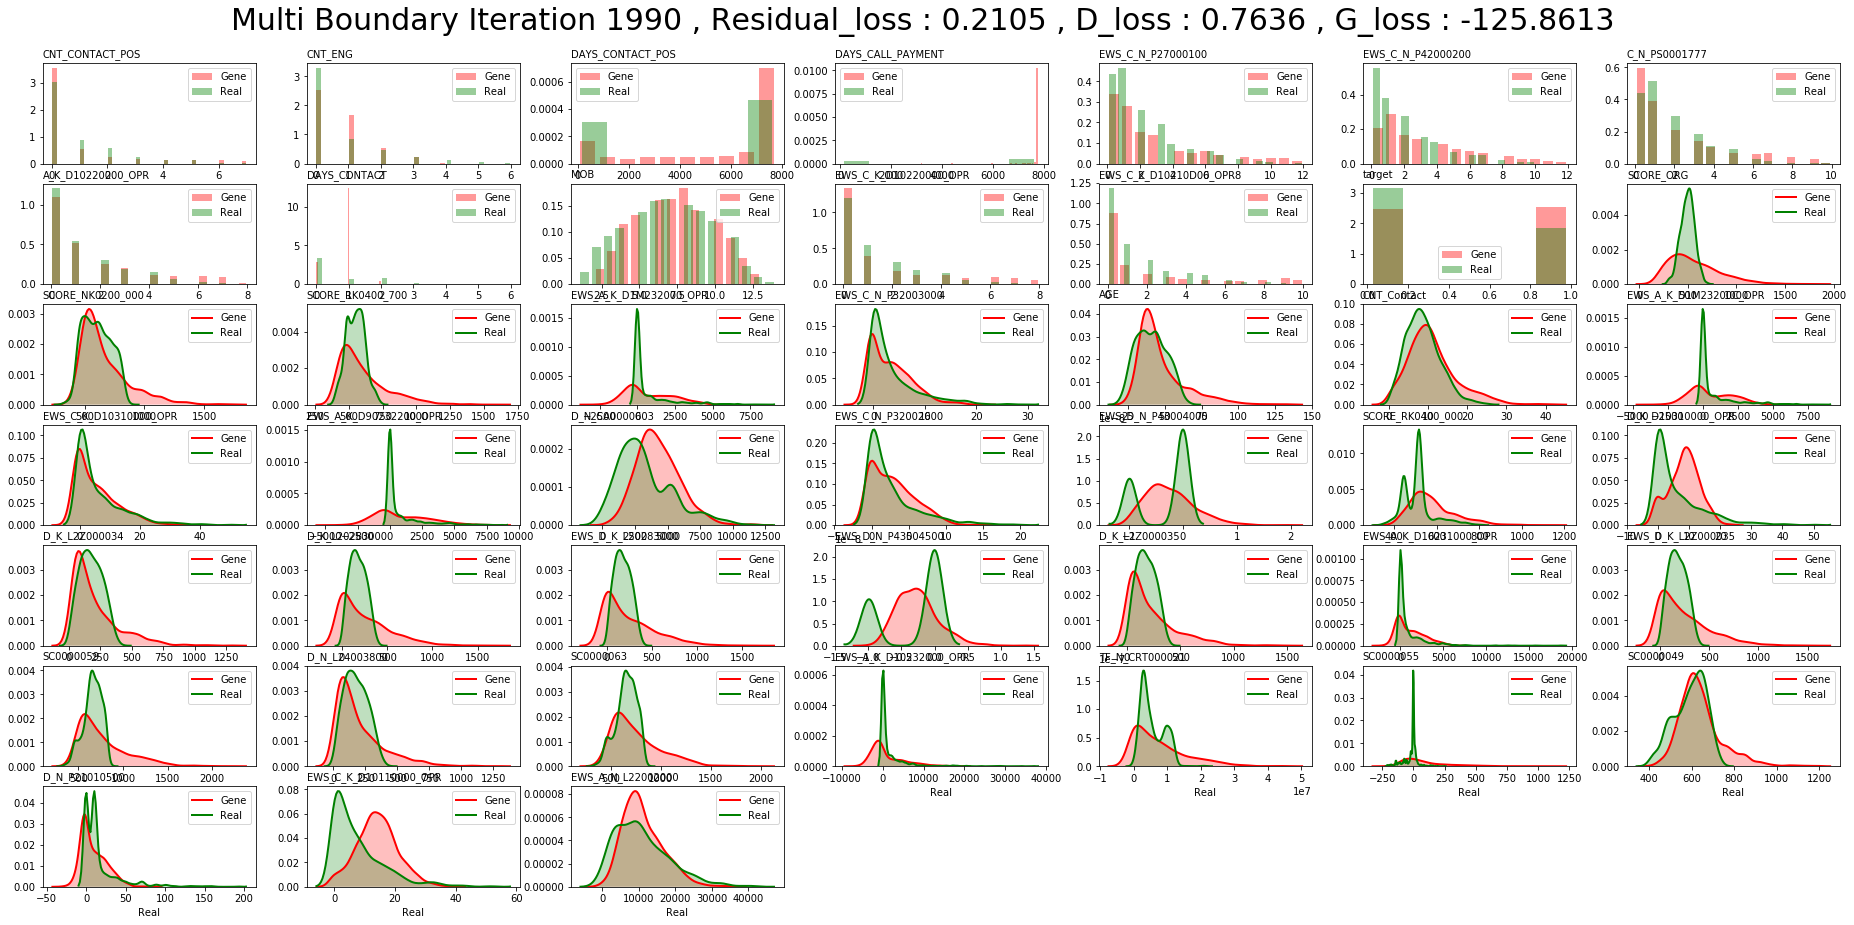

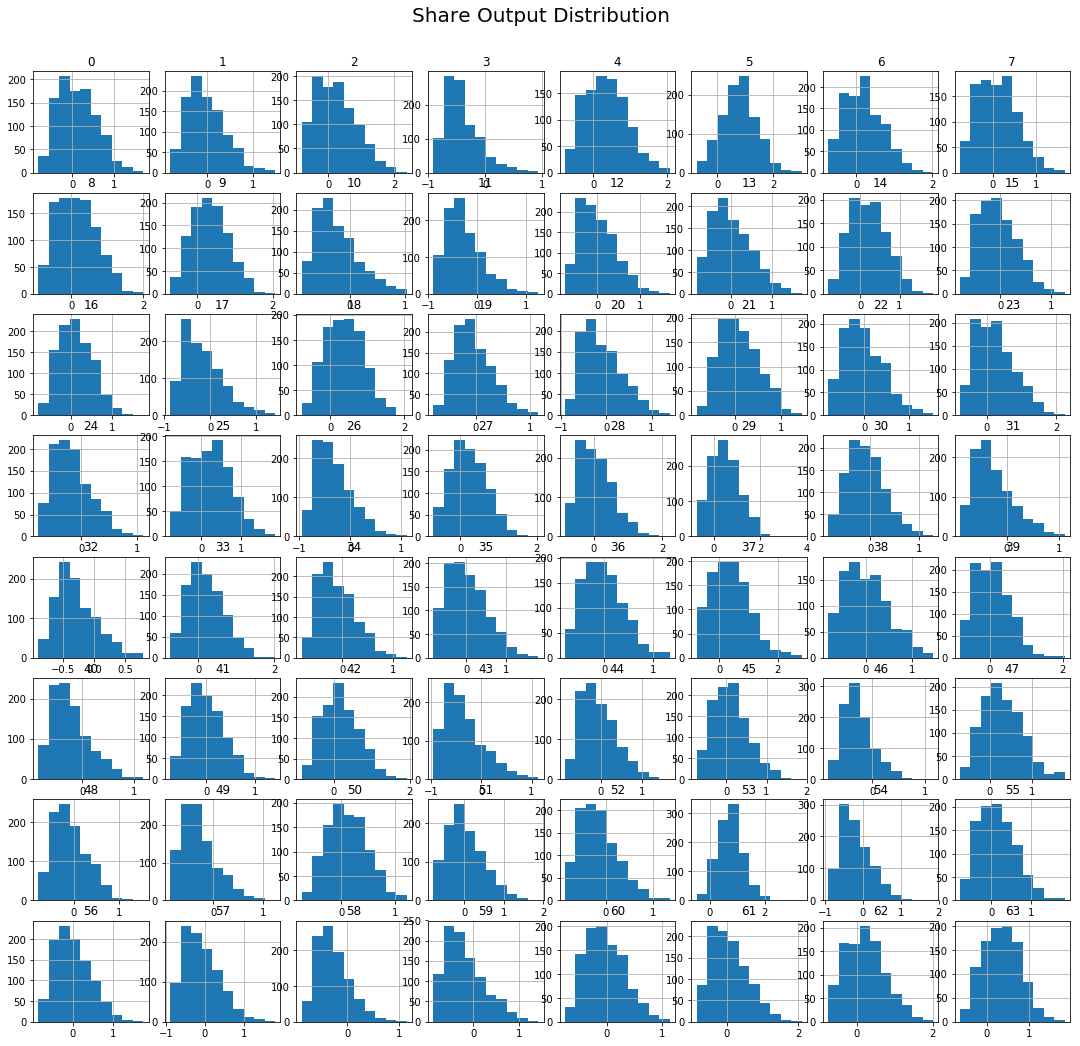

In [ ]:
import warnings
warnings.filterwarnings('ignore')

sess = tf.Session()
tf.global_variables_initializer().run(session=sess)

nd_steps = 5
ng_steps = 2

iteration , dloss , res , gloss , stat , dnum , dfac , dtotal = 0 , 0 ,0 , 0 , 0  ,0 ,0 ,0
output = pd.DataFrame({"iter" : [iteration] , "dloss" : [dloss] , "gloss" : [gloss] , "stat" : [stat] , "dfac" :[dfac], "dnum" :[dnum] , "dtotal" :[dtotal] })


learing_rate_d_exp = 1e-4
learing_rate_g_exp = 1e-4

print("시작")
f = open("wgan_loss_logs.csv",'w')

for i in range(25001):

    for _ in range(nd_steps):
        X_batch = sample_data(data = data , n=batch_size)
        Z_batch = sample_Z(batch_size , zdim , name = "normal")
        _ , dloss , dfac , dnum , dtotal , residual_part_1 , residual_part2_1 , residual_part3_1 ,DraGp1 \
        = sess.run([disc_step, Dloss , d_loss_fac , d_loss_num , d_loss_total ,residual_part , residual_part2 , residual_part3 , DraGp], 
                                  feed_dict={learning_rate_d :learing_rate_d_exp , 
                                             X_total : X_batch, 
                                             X_fac : X_batch[: , list(np.arange(0 , len(fac_var))) ] , 
                                             X_num : X_batch[: , list(np.arange(len(fac_var), len(col) )) ] ,  
                                             Z: Z_batch})

    for _ in range(ng_steps):
        _ , gloss , g_loss_fac2 , g_loss_num2 , g_loss_total2  , stat = sess.run([gen_step, Gloss , g_loss_fac , g_loss_num , g_loss_total , stat_loss ], 
                                   feed_dict={learning_rate_g : learing_rate_g_exp , Z: Z_batch , 
                                              Hint_mean_num : num_mean , Hint_mean_fac : fac_mean , 
                                              Hint_std_num : num_std , Hint_mean_fac : fac_std  ,
                                              Hint_q25_num : num_q25 , Hint_q75_num : num_q75 , 
                                              Hint_q25_fac : fac_q25 , Hint_q75_fac : fac_q75 , 
                                              X_total : X_batch, 
                                              X_num : X_batch[: , list(np.arange(len(fac_var), len(col) )) ] , 
                                              X_fac : X_batch[: , list(np.arange(0 , len(fac_var))) ]})


    if i < 10 : 
        D_limit = 5 
        G_limit = 5 
    elif (i >= 10) & (i < 20) :
        D_limit = 3.5
        G_limit = 3.5
    else : 
        D_limit = 1
        G_limit = 1
    dcount = 0 
    while dloss > D_limit  : 
        dcount += 1

        _ , dloss , dfac , dnum , dtotal , residual_part_1 , residual_part2_1 , residual_part3_1 ,DraGp1 \
        = sess.run([disc_step, Dloss , d_loss_fac , d_loss_num , d_loss_total ,residual_part , residual_part2 , residual_part3 , DraGp ], 
                                  feed_dict={learning_rate_d :learing_rate_d_exp , 
                                             X_total : X_batch, 
                                             X_fac : X_batch[: , list(np.arange(0 , len(fac_var))) ] , 
                                             X_num : X_batch[: , list(np.arange(len(fac_var), len(col) )) ] , 
                                             Z: Z_batch})

        if dcount > 100 : 
            print("")
            print("Dloss : {}".format(dloss))
            print("Iteration : {} , Dloss[wd_total] : {} , Dloss[gp_total] : {} , Dloss[total] : {} , Dlss[Gp] : {}".format(i , "Not" , "Not" , dtotal, DraGp1))
            print("Iteration : {} , Dloss[factor] : {} , Dloss[num] : {} , Dloss[total] : {}".format(i , dfac , dnum , dtotal))
            print("Iteration : {} , Dloss[factor Res] : {} , Dloss[num Res] : {} , Dloss[total Res] : {}".format(i , residual_part_1 , residual_part2_1 , residual_part3_1 ))
            print("")
            if i % 5 == 0 : 
                clear_output(wait= True)
            break
    gcount = 0 
    while gloss > G_limit :
        gcount += 1 

        _, gloss , stat   = sess.run([gen_step, Gloss , stat_loss ], 
                                    feed_dict={learning_rate_g : learing_rate_g_exp  , Z: Z_batch ,
                                               Hint_mean_num : num_mean , Hint_mean_fac : fac_mean , 
                                               Hint_std_num : num_std , Hint_mean_fac : fac_std,
                                               Hint_q25_num : num_q25 , Hint_q75_num : num_q75 , 
                                               Hint_q25_fac : fac_q25 , Hint_q75_fac : fac_q75 ,
                                               X_total : X_batch, 
                                               X_num : X_batch[: , list(np.arange(len(fac_var), len(col) )) ] , 
                                               X_fac : X_batch[: , list(np.arange(0 , len(fac_var))) ]})

        if gcount > 100 :
            print(" {}th  Generate Loss : {} STAT Loss {}".format(i, gloss , stat) )
            break

#     if i % 5 == 0 : 
#         clear_output(wait= True)

    iteration +=1
    output1 = pd.DataFrame({"iter" : [iteration] , "dloss" : [dloss] , "gloss" : [gloss] , "stat" : [stat] , "dfac" :[dfac], "dnum" :[dnum] , "dtotal" :[dtotal] })
    output  = output.append(output1)
    if i % 10 == 0 : 
        
        print("Iteration : {} , Gloss[factor] : {} , Gloss[num] : {} , Gloss[total] : {} , G[STAT] : {}".format(i , g_loss_fac2 , g_loss_num2 , g_loss_total2 , stat) )
        print("iteration : {} , Dloss : {} , Gloss : {}".format(i , dloss , gloss))
        print("Iteration : {} , Dloss[wd_total] : {} , Dloss[gp_total] : {} , Dloss[total] : {} , Dlss[Gp] : {}".format(i , "Not" , "Not" , dtotal, DraGp1))
        print("Iteration : {} , Dloss[factor] : {} , Dloss[num] : {} , Dloss[total] : {}".format(i , dfac , dnum , dtotal))
        print("Iteration : {} , Dloss[factor Res] : {} , Dloss[num Res] : {} , Dloss[total Res] : {}".format(i , residual_part_1 , residual_part2_1 , residual_part3_1 ) )
    if i% 10 == 0:


        output = output[output.iter>0]
        dloss = round( np.float64(dloss),4)
        gloss = round( np.float64(gloss),4)
        stat = round( np.float64(stat),4)
        res = residual_part_1 + residual_part2_1 + residual_part3_1
        res = round( np.float64(res),4)
        clear_output(wait= True)



        show_plot(output = output , row = 7 , ncol=7)
    
        f.write("=====================================================\n")
        f.write('Iter  | D LOSS    | G LOSS\n')
        f.write("%d    | %.2f      | %.2f\n"%(i , dloss , gloss))
        f.write("=====================================================\n")
        f.write('Iter  | G_FAC     | G_NUM      | G_Total\n')
        f.write("%d    | %.2f      | %.2f       | %.2f\n"%(i , g_loss_fac2 , g_loss_num2 , g_loss_total2))
        f.write("=====================================================\n")
        f.write('Iter  | D_total   | D_gp_total | D_wd_total\n')
        f.write("%d    | %.2f      | %.2f       | %.2f\n"%(i , dtotal , 0.0 , 0.0))
        f.write("=====================================================\n")
        f.write('Iter  | D_fac     | D_num \n')
        f.write("%d    | %.2f      | %.2f\n"%(i , dfac , dnum))
        f.write("=====================================================\n")
        f.write('Iter  | D fac res | D_num_res  | D_total_res\n')
        f.write("%d    | %.2f      | %.2f       | %.2f\n"%(i , residual_part_1 , residual_part2_1 , residual_part3_1 ))
        f.write("=====================================================\n")
    
    #         plt.xlabel('iterations (epochs)')
    #         plt.ylabel('learning rate')
    #         plt.plot(range(1,global_step_count), rates)
    #         plt.savefig("./rates_plot.png")
    #         plt.show()


갑자기 
1. Input contains NaN, infinity or a value too large for dtype('float32').
2. cannot convert float NaN to integer
    * D 부분이 loss nan, 그래서 layer를 크게 해주니 잘 학습 됨 새로운 사실 발견.
    * [20, 10] [20, 20, 10].  nan 생김 1시 16분 근처 문제 있음
    * [30, 30] 은 아주 잘된다.
    * [30,30,20] 은 안된다...머지 대체...
    * [30,30,30] 은 된다... 이게 대체 머지
    * [30,30] 중에서도 dropout 0.5를 해야 된다. 대체 머지....
    * ==> 쪼개서 보니 어떤 특정한게 nan이 된다. 
    * 뿐만 아니라 한 번 그려보니 잘만 그리면 다양하게 그릴 수 있을것 같다.
    * D_num은 leaky_relu가 좋다. 
    * D_loss total 이 엄청 크게 나온다 G loss는 엄청 작게 나온다. 0125/20:25
    * D_loss total 의 Gradient term이 문제가 발생하는 거여서 그 부분에 clip_by_value를 해줬다.
    
잘 되다가 이것이 생기는 이유는?


* 결과 정리
    * 4개까지는 잘됨 
    * 8개도 어느정도 잘 되는 것을 확인
    * 12개도 나쁘지 않게 됨.
    * 16개도 잘되는데 그것뿐만 아니라 binary도 너무 잘 학습한다.
    * hidden layer를 늘렸는데 별로 효과가 좋지 않다.
    
 * 개선사항
     * 지금은 fac 와 continuous 한 경우만 나눴지만 **Binary**한 경우도 고려해서 하는게 더 좋다고 함
     * 지금까지는 G = [15,15] 가 먼가 제일 좋았음 [20,20] 꽝!
     * wgan gp 추가 적용
         * LOSS 폭발하는 사건은 SCALE 의 문제 조정해주니 미친 듯이 낮아지진 않음 (더 좋은 성능을 보임)
     * factor 변수에 좀 더 무게감을 실어주기 위해 SSE / n 정도의 loss를 더 추가시켜줬다. 
          * 이러한 부분을 통해 좀 더 그런 쪽에 반응을 하기를 기대하면서
     * 특정조건 만족할 때 까지 제약 주기
     * 왜도와 첨도를 구현해서 같이 넣어줌 약간 힌트같은 벡터를 넣어주고 싶은데 어떤식으로 해야할지..
     * cyclic learning rate 도입해봄 (이상함)
     * adam (beta1 = 0 beta = 0.9 , lr = 0.0001 ) 사용 (wgan gp 저자)
     * bn 안하는게 좋다해서 일단 사용 x
     * learning rate decay를 한 다음 학습이 잘 안될 때는 반대로 올려주는 방식으로 
     * res는 거의 일정하고 gloss는 시간이 오르면 2 정도로 수렴한다. 
     * 시간이 지나니 D는 점점 강해지면서 res loss가 폭발하기도 함
     * G 와 D 자체 loss는 음수다... 흐음....
     * tf.reduce_mean / tf.redcue_sum
     * skew 코드가 이상해짐 지금 있는 코드가 맞는 듯
     * 굳이 통계량 값 안 넣어도 어느정도 따라가는게  많긴 많음 오히려 넣으면 더 불안정 한듯
     * 첨도가 아주 큰 분포는 어떻게 해야 학습이 잘 될까 단순히 뾰족할 분인데
     * factor 변수는 특이한 값을 학습시키기 위한 방법 진행 중 

## 